In [199]:
import pandas as pd
import numpy as np

# Version 1

In [94]:
dices = []

def running_mean(dice):
    dices.append(dice)
    shoe_size = 6
    return shoe_size + np.mean(dices)

In [95]:
running_mean(4)

10.0

In [96]:
running_mean(1)

8.5

In [97]:
running_mean(4)

9.0

In [98]:
running_mean(1)

8.5

In [99]:
running_mean(2)

8.4

In [100]:
running_mean(4)

8.666666666666666

In [101]:
running_mean(6)

9.142857142857142

In [102]:
running_mean(4)

9.25

In [103]:
running_mean(1)

9.0

In [104]:
running_mean(3)

9.0

<AxesSubplot:ylabel='Count'>

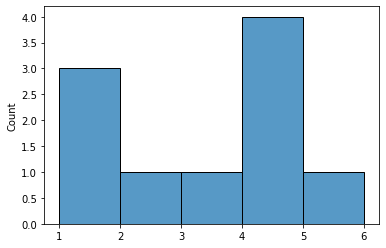

In [106]:
import seaborn as sns
sns.histplot(dices)

In [107]:
len(dices)

10

# Version 2

In [109]:
shoe_size = 10

def dice_mean(no_games):
    dices = np.random.randint(1, 7, size=no_games)
    sns.histplot(dices)
    return shoe_size + np.mean(dices)

13.5195

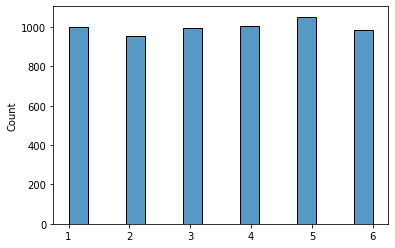

In [113]:
dice_mean(6000)

# Solution

## 1000 games with 60 roll of a dice to minimize risk to <5%

In [266]:
games = np.random.randint(1,7,(1000,60))

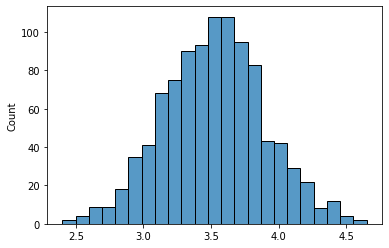

In [208]:
games_mean = np.mean(games,axis=1) 
sns.histplot(games_mean);

In [211]:
lost_games = (games_mean <3.0) | (games_mean >4.0) #Because you always substract mean and round up or down to next int (strategy to find shoesize)
np.mean(lost_games)

0.174

## Find optimal strategy to minimize risk and maximize gains

In [258]:
#Create empty arrays with length 100
p_win = np.zeros(100)
reward = np.zeros(100)
exp_value = np.zeros(100)

#calculate p_win, reward and exp_value for 1 to 100 
for i in range(1,101):
    
    games = np.random.randint(1,7,(1000,i)) # outcome of 1000 games with i rolls of a dice
    games_mean = np.mean(games,axis=1) # mean per game (per row)
    
    lost_games = (games_mean <3.0) | (games_mean >4.0) #games are lost if they are <3 or >4

    p_win[i-1]=(1-np.mean(lost_games)) #winning percentage for i tosses
    
    reward[i-1]=(100-i) #reward after guessing correct size after i tosses
    
    exp_value[i-1]=p_win[i-1]*reward[i-1] #expected value


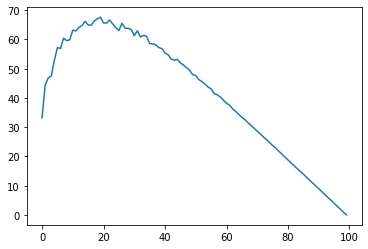

In [259]:
plt.plot(exp_value)

In [263]:
# optimal no of tosses
opt_no = np.argmax(exp_value)+1 #Number of tosses for optimal cost/gain (+1 because of index 0 in list)
opt_no

20